# Import the necessary libraries: Start by importing the required libraries, including pandas, numpy, matplotlib, scikit-learn, and seaborn.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [8]:
breast_cancer_data = load_breast_cancer()

# creating dataframe 
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

# creating target column
df['target'] = breast_cancer_data.target

# print the dataset (first few rows)
print (df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# Remove constant columns: Remove any columns in the dataset that have constant values.

In [9]:
# Find constant columns
constant_columns = df.columns[df.nunique() == 1]

# Remove constant columns
df = df.drop(columns=constant_columns)

# Display the updated DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [10]:
print (df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

# Encode categorical features: If the dataset contains any categorical features, encode them using one-hot encoding or label encoding.

In [11]:
# The dataset that we are having currntly contains only continious features. So we do not need to use one-hoot encoding or label encoding

# Feature scaling: Scale the numerical features using scikit-learn's StandardScaler or MinMaxScaler function.

In [12]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_features' contains a list of column names that are numerical
numerical_features = df.columns.drop('target')  # Exclude the target column if present

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# Correlation analysis: Use seaborn's heatmap() function to plot a heatmap of the correlation matrix between the features. Identify highly correlated features and remove one of them.

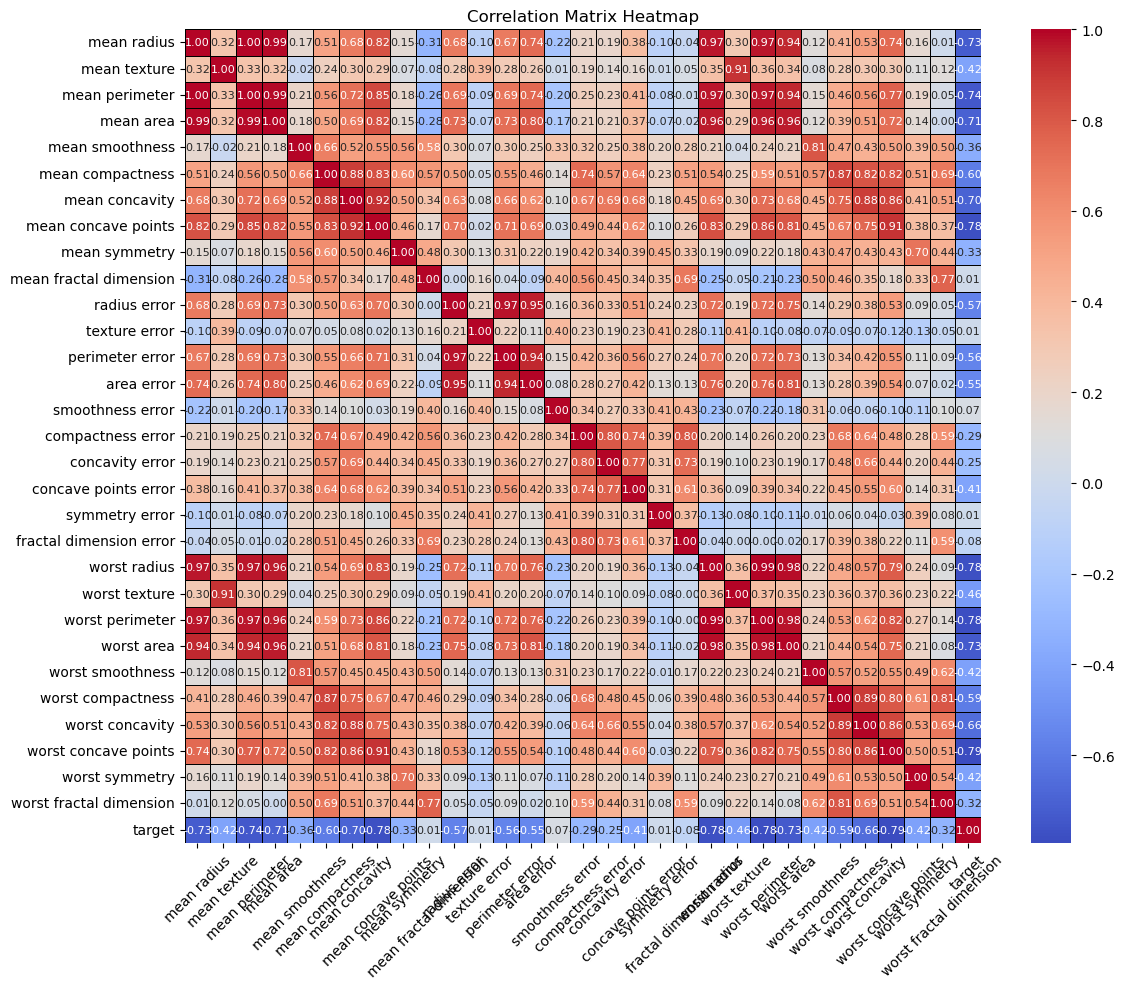

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5, linecolor='black')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Feature selection: Use scikit-learn's SelectKBest or SelectPercentile function to select the k best or top percentile features based on their correlation with the target variable.

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Load breast cancer dataset
breast_cancer_data = load_breast_cancer()
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
y = breast_cancer_data.target

# Initialize SelectKBest with the scoring function
k = 5  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)

# Fit selector to the data
selector.fit(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected features:", selected_features)

Selected features: Index(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')


# Choose a different dataset and perform feature scaling, selection, and constant column removal using different techniques. Be creative!

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

# Display the first few rows of the dataset
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
print(X_scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


In [21]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with the chi-square scoring function
k = 2  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)

# Fit selector to the data
selector.fit(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected features:", selected_features)

Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [22]:
# Find constant columns
constant_columns = X.columns[X.nunique() == 1]

# Remove constant columns
X_filtered = X.drop(columns=constant_columns)

# Display the updated DataFrame
print(X_filtered.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
